In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
# tree search to find the best path - start at current location and the reward is distance around the track in a given time

# control actions
# accelerate +/- 1 m/s^2
# turn wheels 5 degrees

# node dies if it gets more than 4.0 meters from the center of the road

(-35.63154811025878,
 97.58573540983048,
 -45.234560723170915,
 203.81763723989775)

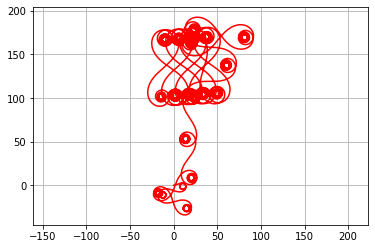

In [31]:
class CarParam:
    max_steer = math.radians(30)
    max_speed = 30.0
    accel_step = 0.1
    steer_step = math.radians(5)
    length = 2.0
    track_half_width = 5.0
    max_dist_from_centerline = 4.0
    
    def __init__(self):
        pass

class State:
    X = np.array([0, # x
                  0, # y
                  0, # v
                  0, # steering
                  0]) # heading
    
    
    def __init__(self, X):
        self.X = X
        
    def propagate(self, u_lin, u_steer, dt, car):
        Y = self.X.copy()
        Y[2] += u_lin * dt# update speed
        Y[2] = min(car.max_speed, max(0, Y[2]))
        Y[3] += u_steer * dt# update steering
        Y[3] = min(car.max_steer, max(-car.max_steer, Y[3]))
        Y[4] += Y[2]/car.length * math.tan(Y[3]) * dt # heading
        Y[0] += Y[2] * math.cos(Y[4]) * dt # x position
        Y[1] += Y[2] * math.sin(Y[4]) * dt # y position
        return Y
    
    def evaluate(self, xm1, map):
        # check if total acceleration is acceptable
        
        """Check if we are still on the track"""
        # find closest edge on track 
        # get distance
        
        
        
        
    

car = CarParam()

x = State(np.array([0.0, #x
                    0.0, #y
                    1.0, #v
                    math.radians(20.0), #steering
                    0.0])) # heading

u_lin = 0.1
u_steer = math.radians(5.0)

pos = []
pos.append([x.X[0], x.X[1]])
for i in range(5000):
    if i % 250 == 0:
        u_steer *= -1
    x = State(x.propagate(u_lin, u_steer, 0.1, car))
    pos.append([x.X[0], x.X[1]])
    
plt.plot(np.array(pos)[:,0], np.array(pos)[:,1], 'r')
plt.grid()
plt.axis('equal')